In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random
import math
import seaborn as sns
import statistics 

In [3]:
url = "https://data.ontario.ca/dataset/a5871234-ed52-4c79-af33-b205aee59fd3/resource/7f408f5e-71c7-43fa-82bf-5eb8be77b9a7/download/2022_municipal_election_-_successful_candidate_data_as_of_voting_day.csv"

df = pd.read_csv(url, encoding='latin1')
df.head()

,MUNICIPALITY,LAST_NAME,FIRST_NAME,OFFICE_FILLED,VOTES_FOR_CANDIDATE,VOTES_FOR_OFFICE,ELECTED_OR_ACCLAIMED,COUNCIL_INCUMBENT,OFFICE_INCUMBENT,OFFICE_SUBJECT_TO_RECOUNT
0,Addington Highlands Tp,Hogg,Henry,Reeve,980.0,1539.0,Elected,Yes,Yes,No
1,Addington Highlands Tp,Fritsch,Tony,Local Councillor,464.0,1226.0,Elected,Yes,Yes,No
2,Addington Highlands Tp,Thompson,Kirby,Local Councillor,377.0,1226.0,Elected,Yes,Yes,No
3,Addington Highlands Tp,Yanch,E. Helen,Local Councillor,366.0,1482.0,Elected,Yes,Yes,No
4,Addington Highlands Tp,Hook,Kenneth,Local Councillor,563.0,1482.0,Elected,No,No,No


## Exporing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MUNICIPALITY               2798 non-null   object 
 1   LAST_NAME                  2796 non-null   object 
 2   FIRST_NAME                 2796 non-null   object 
 3   OFFICE_FILLED              2798 non-null   object 
 4   VOTES_FOR_CANDIDATE        2252 non-null   float64
 5   VOTES_FOR_OFFICE           2153 non-null   float64
 6   ELECTED_OR_ACCLAIMED       2796 non-null   object 
 7   COUNCIL_INCUMBENT          2796 non-null   object 
 8   OFFICE_INCUMBENT           2796 non-null   object 
 9   OFFICE_SUBJECT_TO_RECOUNT  2655 non-null   object 
dtypes: float64(2), object(8)
memory usage: 218.7+ KB


* Need to fill null values.
* 2 values are null in all columns except municipality, we can drop those rows.
* Data types of all attributes are as indented, no type convertion is need.

In [5]:
df.shape   # 2798 data POints are available

(2798, 10)

In [6]:
df.columns

Index(['MUNICIPALITY', 'LAST_NAME', 'FIRST_NAME', 'OFFICE_FILLED',
       'VOTES_FOR_CANDIDATE', 'VOTES_FOR_OFFICE', 'ELECTED_OR_ACCLAIMED',
       'COUNCIL_INCUMBENT', 'OFFICE_INCUMBENT', 'OFFICE_SUBJECT_TO_RECOUNT'],
      dtype='object')

In [7]:
df.describe()

,VOTES_FOR_CANDIDATE,VOTES_FOR_OFFICE
count,2252.000000,2153.000000
mean,2402.758881,8313.774268
std,8941.651970,21240.981606
min,22.000000,44.000000
25%,467.000000,1282.000000
50%,1087.000000,3258.000000
75%,2313.000000,7931.000000
max,342158.000000,551890.000000


## Data Cleaning

#### Dropping null rows which don't have any values except Municipality attribute(only 2 rows).

In [8]:
df = df.dropna(subset=['FIRST_NAME'])

In [9]:
df.shape

(2796, 10)

In [10]:
df.isnull().sum()

MUNICIPALITY                   0
LAST_NAME                      0
FIRST_NAME                     0
OFFICE_FILLED                  0
VOTES_FOR_CANDIDATE          544
VOTES_FOR_OFFICE             643
ELECTED_OR_ACCLAIMED           0
COUNCIL_INCUMBENT              0
OFFICE_INCUMBENT               0
OFFICE_SUBJECT_TO_RECOUNT    141
dtype: int64

#### Filling nulls values in VOTES_FOR_CANDIDATE and VOTES_FOR_OFFICE columns

In [11]:
# Filling 0 for null values in 'VOTES_FOR_CANDIDATE' and 'VOTES_FOR_OFFICE' columns

df['VOTES_FOR_OFFICE'] = df['VOTES_FOR_OFFICE'].fillna(0)
df['VOTES_FOR_CANDIDATE'] = df['VOTES_FOR_CANDIDATE'].fillna(0)


In [12]:
# Fuction for adding votes to 'VOTES_FOR_OFFICE' column where correspoing 'VOTES_FOR_CANDIDATE' have votes.

def vote_values(votes_for_office, votes_for_candidate):
    if votes_for_office == 0 and votes_for_candidate != 0:
        if votes_for_candidate > np.mean(df['VOTES_FOR_OFFICE']):
            return np.max(df['VOTES_FOR_OFFICE'])

        return np.mean(df['VOTES_FOR_OFFICE'])
    elif votes_for_office == 0 and votes_for_candidate == 0:
        return 0
    else:
        return votes_for_office
    
    

In [13]:
# appling votes_values function to 'VOTES_FOR_OFFICE' column.

df['VOTES_FOR_OFFICE']= df.apply(lambda x:vote_values(x['VOTES_FOR_OFFICE'], x['VOTES_FOR_CANDIDATE']), axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2796 entries, 0 to 2797
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MUNICIPALITY               2796 non-null   object 
 1   LAST_NAME                  2796 non-null   object 
 2   FIRST_NAME                 2796 non-null   object 
 3   OFFICE_FILLED              2796 non-null   object 
 4   VOTES_FOR_CANDIDATE        2796 non-null   float64
 5   VOTES_FOR_OFFICE           2796 non-null   float64
 6   ELECTED_OR_ACCLAIMED       2796 non-null   object 
 7   COUNCIL_INCUMBENT          2796 non-null   object 
 8   OFFICE_INCUMBENT           2796 non-null   object 
 9   OFFICE_SUBJECT_TO_RECOUNT  2655 non-null   object 
dtypes: float64(2), object(8)
memory usage: 240.3+ KB


#### Filling null values in OFFICE_SUBJECT_TO_RECOUNT column

In [15]:
# Adding 'No' value to the null values in OFFICE_SUBJECT_TO_RECOUNT column where ELECTED_OR_ACCLAIMED column has 'Acclaimed' Value

df.loc[(df['ELECTED_OR_ACCLAIMED'] == 'Acclaimed') & (df['OFFICE_SUBJECT_TO_RECOUNT'].isnull()),'OFFICE_SUBJECT_TO_RECOUNT'] = 'No'

In [16]:
# Adding 'Yes' value to the null values in OFFICE_SUBJECT_TO_RECOUNT column where ELECTED_OR_ACCLAIMED column has 'Elected' Value

df.loc[(df['ELECTED_OR_ACCLAIMED'] == 'Elected') & (df['OFFICE_SUBJECT_TO_RECOUNT'].isnull()),'OFFICE_SUBJECT_TO_RECOUNT'] = 'Yes'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2796 entries, 0 to 2797
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MUNICIPALITY               2796 non-null   object 
 1   LAST_NAME                  2796 non-null   object 
 2   FIRST_NAME                 2796 non-null   object 
 3   OFFICE_FILLED              2796 non-null   object 
 4   VOTES_FOR_CANDIDATE        2796 non-null   float64
 5   VOTES_FOR_OFFICE           2796 non-null   float64
 6   ELECTED_OR_ACCLAIMED       2796 non-null   object 
 7   COUNCIL_INCUMBENT          2796 non-null   object 
 8   OFFICE_INCUMBENT           2796 non-null   object 
 9   OFFICE_SUBJECT_TO_RECOUNT  2796 non-null   object 
dtypes: float64(2), object(8)
memory usage: 240.3+ KB


In [18]:
df[df['ELECTED_OR_ACCLAIMED'] == 'Elected']['OFFICE_SUBJECT_TO_RECOUNT'].value_counts()

OFFICE_SUBJECT_TO_RECOUNT
No     2170
Yes      82
Name: count, dtype: int64

## Feature engineering 

#### `INCUMBENT` Attribute

In [19]:
# 'Yes' for any of 'COUNCIL_INCUMBENT' or 'OFFICE_INCUMBENT' has Yes value else 'No'

df['INCUMBENT'] = 'No'
df.loc[(df['COUNCIL_INCUMBENT'] == 'Yes') | (df['OFFICE_INCUMBENT'] == 'Yes'), 'INCUMBENT'] = 'Yes'

In [20]:
df.head(2)

,MUNICIPALITY,LAST_NAME,FIRST_NAME,OFFICE_FILLED,VOTES_FOR_CANDIDATE,VOTES_FOR_OFFICE,ELECTED_OR_ACCLAIMED,COUNCIL_INCUMBENT,OFFICE_INCUMBENT,OFFICE_SUBJECT_TO_RECOUNT,INCUMBENT
0,Addington Highlands Tp,Hogg,Henry,Reeve,980.0,1539.0,Elected,Yes,Yes,No,Yes
1,Addington Highlands Tp,Fritsch,Tony,Local Councillor,464.0,1226.0,Elected,Yes,Yes,No,Yes


#### VOTE_SHARE_PCT Attribute

In [21]:
# Calculate vote share percentage for each candidate

df['VOTE_SHARE_PCT'] = (df['VOTES_FOR_CANDIDATE'] / df['VOTES_FOR_OFFICE'] * 100).round(2);

In [22]:
df.head(2)

,MUNICIPALITY,LAST_NAME,FIRST_NAME,OFFICE_FILLED,VOTES_FOR_CANDIDATE,VOTES_FOR_OFFICE,ELECTED_OR_ACCLAIMED,COUNCIL_INCUMBENT,OFFICE_INCUMBENT,OFFICE_SUBJECT_TO_RECOUNT,INCUMBENT,VOTE_SHARE_PCT
0,Addington Highlands Tp,Hogg,Henry,Reeve,980.0,1539.0,Elected,Yes,Yes,No,Yes,63.68
1,Addington Highlands Tp,Fritsch,Tony,Local Councillor,464.0,1226.0,Elected,Yes,Yes,No,Yes,37.85


## Data Analysis

#### Count of candidates who are `Elected` and `Acclaimed`

In [23]:
df['ELECTED_OR_ACCLAIMED'].value_counts()

ELECTED_OR_ACCLAIMED
Elected      2252
Acclaimed     544
Name: count, dtype: int64

C:\Users\ksjad\AppData\Local\Temp\ipykernel_4280\379587576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ELECTED_OR_ACCLAIMED', palette=['skyblue', 'orange'])


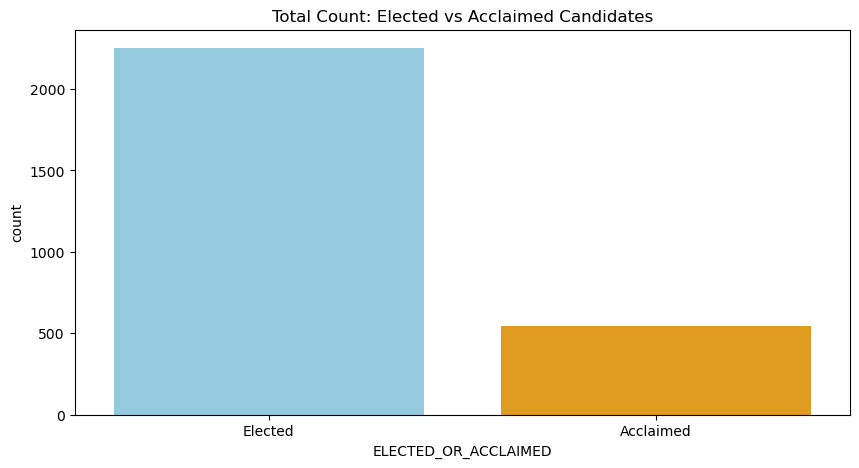

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='ELECTED_OR_ACCLAIMED', palette=['skyblue', 'orange'])
plt.title('Total Count: Elected vs Acclaimed Candidates')
plt.show()

##### Findings/Insights

* 2252 Candidates are elected.

* 544 Candidates are acclaimed

#### Number of candidates `Elected` or `Acclaimed` analysis based on `Incumbency`

In [25]:
df.groupby(['ELECTED_OR_ACCLAIMED','INCUMBENT']).agg({'INCUMBENT':'count'})

INCUMBENT
ELECTED_OR_ACCLAIMED INCUMBENT           
Acclaimed            No               112
                     Yes              432
Elected              No              1049
                     Yes             1203

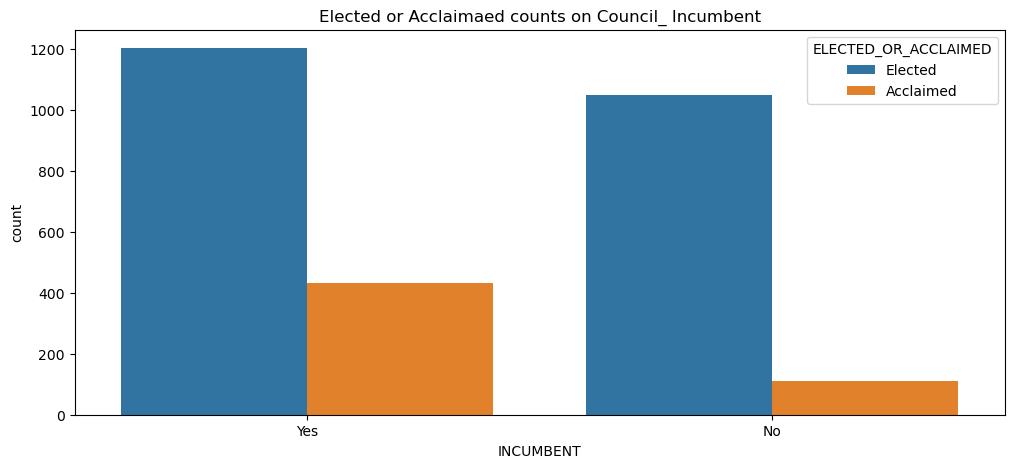

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='INCUMBENT', hue='ELECTED_OR_ACCLAIMED')
plt.title('Elected or Acclaimaed counts on Council_ Incumbent')
plt.show()

##### Findings/Insights

* Approximately 1,200 candidates who previously served were elected.

* Around 400 previously serving candidates were acclaimed (won unopposed).

* More than 1,000 new candidates were elected for the first time.

* About 100 newcomers were acclaimed.

* Overall, candidates with prior service experience had a higher likelihood of being elected compared to fresh candidates.

#### Votes' Percentage 

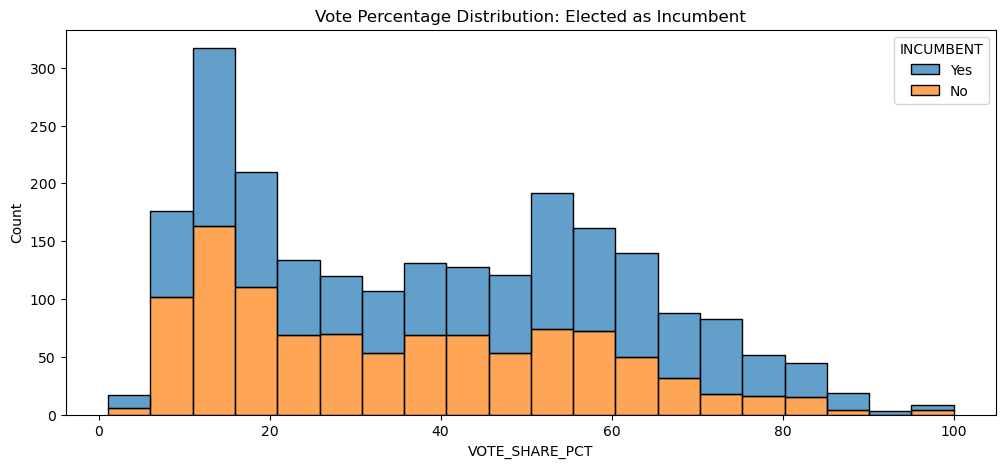

In [27]:
plt.figure(figsize=(12,5))
sns.histplot(data=df[df['ELECTED_OR_ACCLAIMED']=='Elected'], x='VOTE_SHARE_PCT', hue='INCUMBENT', bins=20, alpha=0.7,multiple="stack")
plt.title('Vote Percentage Distribution: Elected as Incumbent')
plt.show()

##### Findings/Insights:

* More number of candidates were elected with around 15 to 25% votes.

* Less number of candidates were elected with 80% and more.

#### Number of positions- Elected or Acclaimed

In [28]:
df.groupby(['OFFICE_FILLED','INCUMBENT']).agg({'MUNICIPALITY':'count'})

MUNICIPALITY
OFFICE_FILLED                 INCUMBENT              
Deputy Mayor                  No                   28
                              Yes                  87
Deputy Reeve                  Yes                   7
Local Councillor              No                 1030
                              Yes                1132
Local and County Councillor   No                    2
                              Yes                   5
Local and District Councillor No                    6
                              Yes                  10
Local and Regional Councillor No                   15
                              Yes                  56
Mayor                         No                   74
                              Yes                 303
Reeve                         No                    6
                              Yes                  31
Reeve (Not Head Of Council)   Yes                   3
Vice Deputy Mayor             Yes                   1

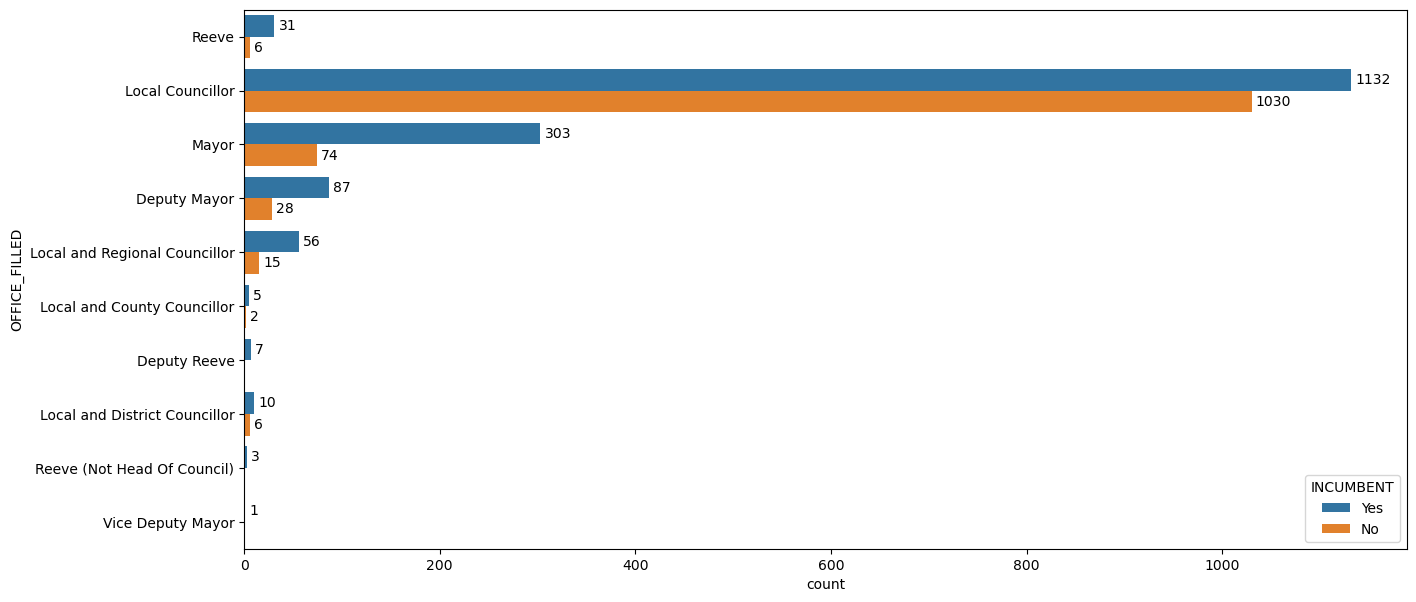

In [29]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = df, y = 'OFFICE_FILLED', hue = 'INCUMBENT')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
    
plt.show()

##### Insights:

* `Reeve`- 31 non-incumbent and 6 incumbent candidates.

* `Local Councillor` positions are the highest counts across ontario(1030 incumbent and 1132 non-incumbent).
    
* `Mayor`- 303 non-incumbent and 74 incumbents.
    
* `Deputy Mayor` positions have 87 incumbent and 28 non-incumbent candidates.
    
* `Local and Regional Councillor` - 15 incumbent and 57 non-incumbent candidates.

#### Municipality-wise Count of Election Entries

In [30]:
df['MUNICIPALITY'].value_counts()

MUNICIPALITY
Toronto C                 26
Ottawa C                  25
Chatham-Kent M            18
Hamilton C                16
Oakville T                15
                          ..
Whitestone M               5
Addington Highlands Tp     5
Wollaston Tp               5
Zorra Tp                   5
Hilliard Tp                4
Name: count, Length: 414, dtype: int64

* `Toronto C` municipality has a higher number of entries i.e. 26.

* `Ottawa C` municipality has 25 and `Chatham-Kent M` municipality has 18 entries.

* `Wollaston Tp` and `Zorra Tp` municipalites each have 5 entries which are second lowest.

* `Hilliard Tp` municipality has 4 entries which is the lowest entries in our dataset.

#### Candidate Incumbency Across big cities Toronto, Ottawa and Chatham-Kent

In [31]:
d = df[(df['MUNICIPALITY'] == 'Toronto C') | (df['MUNICIPALITY'] == 'Ottawa C') | (df['MUNICIPALITY'] == 'Chatham-Kent M')]
d.groupby(['MUNICIPALITY','INCUMBENT'])['MUNICIPALITY'].value_counts()

MUNICIPALITY    INCUMBENT
Chatham-Kent M  No            5
                Yes          13
Ottawa C        No           12
                Yes          13
Toronto C       No            9
                Yes          17
Name: count, dtype: int64

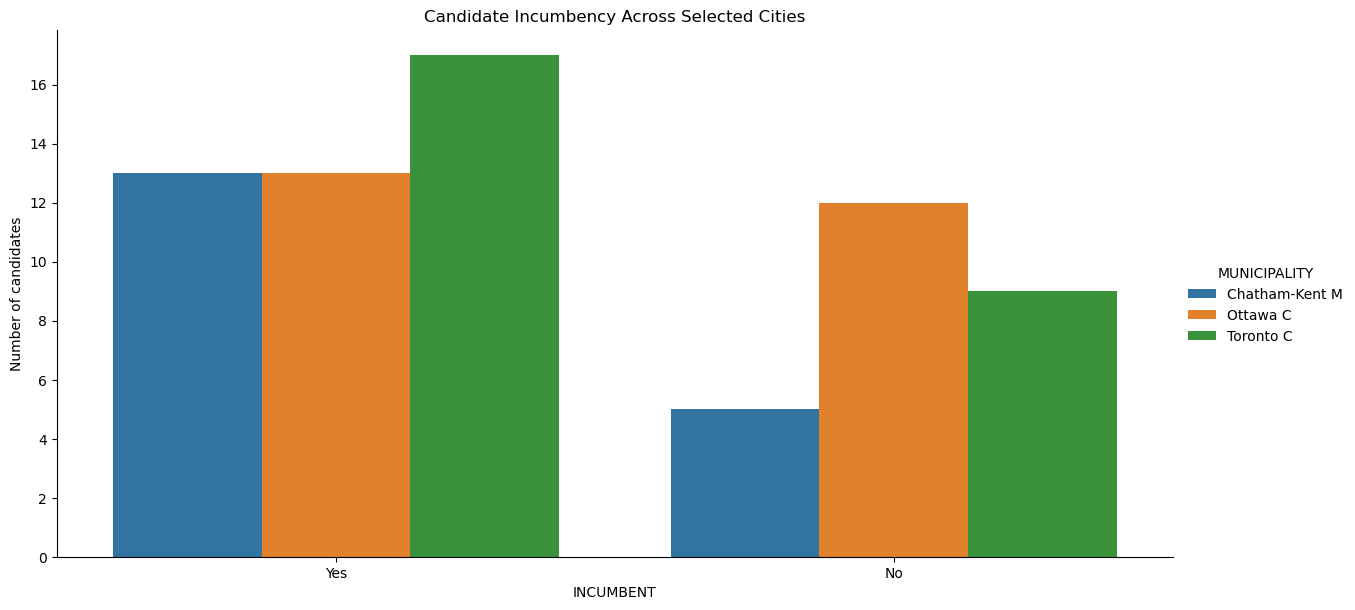

In [32]:
sns.catplot(data = d, x = 'INCUMBENT', hue = 'MUNICIPALITY', kind = 'count', height = 6, aspect = 2)
plt.title('Candidate Incumbency Across Selected Cities')
plt.ylabel('Number of candidates')
plt.show()

##### Findings/Insights:

* In `Chatham-Kent M` municipality 5 candidates were elected for the first time, while 13 previously serving candidates were re-elected.

* In `Ottawa C` municipality 12 new candidates were elected, and 13 were re-elected incumbents.

* In `Toronto C` municipality 9 candidates are elected for the first time and 17 candidates are re-elected who served before.

* Across `Chatham-Kent M` and `Toronto C` municipalities, incumbent candidates consistently outperformed.

* In `Ottawa C` municipality both incumbent and non-incumbent candidates performed nearly equally well.

#### Candidate Incumbency Across smaller cities `Zorra Tp`, `Hilliard Tp` and  `Wollaston Tp`

In [33]:
d = df[(df['MUNICIPALITY'] == 'Zorra Tp') | (df['MUNICIPALITY'] == 'Hilliard Tp')| (df['MUNICIPALITY'] == 'Wollaston Tp')]
d.groupby(['MUNICIPALITY','INCUMBENT'])['MUNICIPALITY'].value_counts()

MUNICIPALITY  INCUMBENT
Hilliard Tp   No           1
              Yes          3
Wollaston Tp  No           4
              Yes          1
Zorra Tp      No           2
              Yes          3
Name: count, dtype: int64

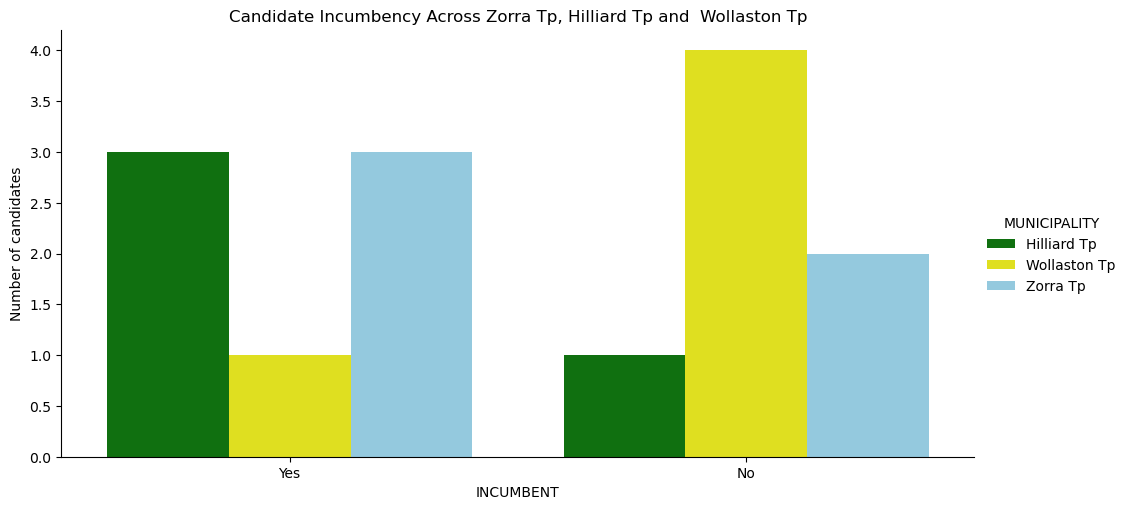

In [34]:
sns.catplot(data = d, x = 'INCUMBENT', hue = 'MUNICIPALITY', kind = 'count', height = 5, aspect = 2, palette = ['green','yellow','skyBlue'])
plt.title('Candidate Incumbency Across Zorra Tp, Hilliard Tp and  Wollaston Tp')
plt.ylabel('Number of candidates')
plt.show()

##### Findings/Insights:

* In `Hilliard Tp` municipality 1 candidate was elected for the first time, while 3 previously serving candidates were re-elected.

* In `Wollaston Tp` municipality 4 new candidates were elected, and 1 was re-elected incumbents.

* In `Zorra Tp` municipality 2 candidates are elected for the first time and 3 candidates are re-elected who served before.

* Across `Hilliard Tp` and `Zorra Tp` municipalities, incumbent candidates performed well.

* In `Wollaston Tp` municipality non-incumbent candidates outperformed.

#### Counts of all positions

In [35]:
df['OFFICE_FILLED'].value_counts()

OFFICE_FILLED
Local Councillor                 2162
Mayor                             377
Deputy Mayor                      115
Local and Regional Councillor      71
Reeve                              37
Local and District Councillor      16
Local and County Councillor         7
Deputy Reeve                        7
Reeve (Not Head Of Council)         3
Vice Deputy Mayor                   1
Name: count, dtype: int64

#### Number of `local councillors` across municipalities

In [36]:
df[df['OFFICE_FILLED'] == 'Local Councillor']['MUNICIPALITY'].value_counts()

MUNICIPALITY
Toronto C               25
Ottawa C                24
Chatham-Kent M          17
Hamilton C              15
London C                14
                        ..
Tweed M                  3
Alnwick-Haldimand Tp     3
Tyendinaga Tp            3
Ajax T                   3
Brampton C               2
Name: count, Length: 412, dtype: int64

#### `Municipality` counts where there `VOTES_FOR_OFFICE` values between 100000 and 200000

In [63]:
df[(df['VOTES_FOR_OFFICE'] < 2000000) & (df['VOTES_FOR_OFFICE'] > 100000)]['MUNICIPALITY'].value_counts()

MUNICIPALITY
Niagara Falls C    8
Thunder Bay C      5
Markham C          4
Hamilton C         1
Milton T           1
Mississauga C      1
Ottawa C           1
St Thomas C        1
Toronto C          1
Name: count, dtype: int64

#### `Local Councillor` and `Mayor` positions count across Toronto, Ottawa and Chatham-Kent M

In [56]:
d = df[(df['OFFICE_FILLED'] == 'Local Councillor') | (df['OFFICE_FILLED'] == 'Mayor')]
d[d['MUNICIPALITY'].isin(['Toronto C','Ottawa C','Chatham-Kent M'])]['MUNICIPALITY'].value_counts()

MUNICIPALITY
Toronto C         26
Ottawa C          25
Chatham-Kent M    18
Name: count, dtype: int64

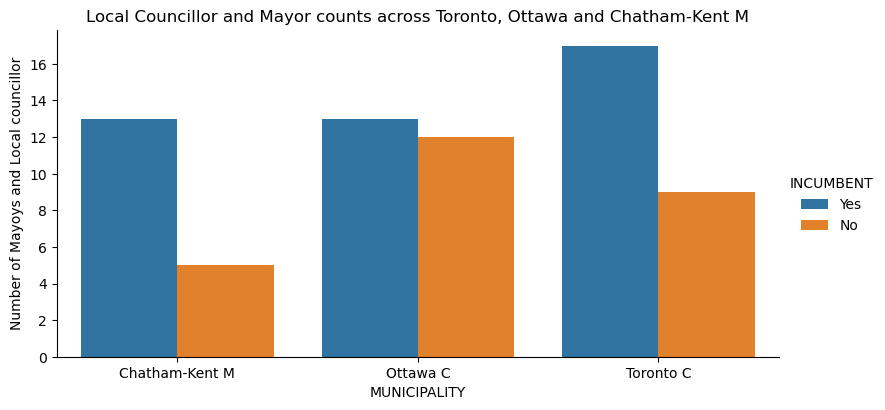

In [70]:
sns.catplot(data = d[d['MUNICIPALITY'].isin(['Toronto C','Ottawa C','Chatham-Kent M'])], x ='MUNICIPALITY' ,hue='INCUMBENT', kind = 'count', height = 4, aspect = 2)
plt.title('Local Councillor and Mayor counts across Toronto, Ottawa and Chatham-Kent M')
plt.ylabel('Number of Mayoys and Local councillor')
plt.show()

##### Insights:

* `Toronto` municipality has total 26 `Mayor` and local `Councillor`.
  
* `Ottawa` municipality has total 25 `Mayor` and local `Councillor`.

* `Chatham-Kent M` municipality has total 18 `Mayor` and local `Councillor`.

# Model

In [41]:
# Importing requeried libraries

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import scipy, scipy.stats

In [42]:
# creating X(independent variable) and Y(dependent variable)

Y1 = df['VOTES_FOR_CANDIDATE']
X1 = df[['VOTES_FOR_OFFICE']]
X1 = sm.add_constant(X1)  
Model1 = sm.OLS(Y1, X1).fit()
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     VOTES_FOR_CANDIDATE   R-squared:                       0.419
Model:                             OLS   Adj. R-squared:                  0.419
Method:                  Least Squares   F-statistic:                     2016.
Date:                 Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                         19:07:03   Log-Likelihood:                -28364.
No. Observations:                 2796   AIC:                         5.673e+04
Df Residuals:                     2794   BIC:                         5.674e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              398.4072    121.423      3.281      0.001     160.319     636.495
VOTES_FOR_OFFICE     0.2190      0.005     44.895      0.000       0.209       0.229
==============================================================================
Omnibus:                     5374.554   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55579495.060
Skew:                          13.863   Prob(JB):                         0.00
Kurtosis:                     693.151   Cond. No.                     2.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
print('Parameters: ',  Model1.params)
print('R2 value: ', Model1.rsquared)

Parameters:  const               398.407190
VOTES_FOR_OFFICE      0.218966
dtype: float64
R2 value:  0.4190685589195907


##### Findings:

* About 41.9% of the variation in VOTES_FOR_CANDIDATE is explained by VOTES_FOR_OFFICE.

* Regression equation for this model: `VOTES_FOR_CANDIDATE = 398.4 + 0.218 × VOTES_FOR_OFFICE`.

* `Standard error` for constant is 121.4 and for `VOTES_FOR_OFFICE` is 0.005.

* The relationship between office votes and candidate votes is very precisely estimated.

* `P-value` is 0 strong evidence the effect is real.

### using dummy variables

In [44]:
# Creating dummies for INCUMBENT attribute

incumbent_df = pd.get_dummies(df['INCUMBENT'], dtype=int)
incumbent_df.rename(columns={'No':'INCUMB_NO', 'Yes':'INCUMB_YES'}, inplace = True)

In [45]:
# Creating dummies for ELECTED_OR_ACCLAIMED attribute

electacc_df = pd.get_dummies(df['ELECTED_OR_ACCLAIMED'], dtype=int)
electacc_df.head(2)

,Acclaimed,Elected
0,0,1
1,0,1


In [46]:
df_with_dummies = pd.concat([df , electacc_df,incumbent_df], axis = 1)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_with_dummies['VOTES_FOR_OFFICE'] = scaler.fit_transform(df_with_dummies[['VOTES_FOR_OFFICE']])

df_with_dummies.head(2)

,MUNICIPALITY,LAST_NAME,FIRST_NAME,OFFICE_FILLED,VOTES_FOR_CANDIDATE,VOTES_FOR_OFFICE,ELECTED_OR_ACCLAIMED,COUNCIL_INCUMBENT,OFFICE_INCUMBENT,OFFICE_SUBJECT_TO_RECOUNT,INCUMBENT,VOTE_SHARE_PCT,Acclaimed,Elected,INCUMB_NO,INCUMB_YES
0,Addington Highlands Tp,Hogg,Henry,Reeve,980.0,-0.229417,Elected,Yes,Yes,No,Yes,63.68,0,1,0,1
1,Addington Highlands Tp,Fritsch,Tony,Local Councillor,464.0,-0.242521,Elected,Yes,Yes,No,Yes,37.85,0,1,0,1


In [49]:
Model2 = ols("VOTES_FOR_CANDIDATE ~ VOTES_FOR_OFFICE + INCUMB_YES + Elected", data =df_with_dummies ).fit()  # not creating Constant-- to match the Dimensions
print(Model2.summary())

                             OLS Regression Results                            
Dep. Variable:     VOTES_FOR_CANDIDATE   R-squared:                       0.421
Model:                             OLS   Adj. R-squared:                  0.420
Method:                  Least Squares   F-statistic:                     675.5
Date:                 Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                         19:07:15   Log-Likelihood:                -28360.
No. Observations:                 2796   AIC:                         5.673e+04
Df Residuals:                     2792   BIC:                         5.675e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1123.4732   

##### Findings:

* About 42.1% of the variation in VOTES_FOR_CANDIDATE is explained by VOTES_FOR_OFFICE , INCUMBENT_YES and Elected.

* Regression equation for this model: `VOTES_FOR_CANDIDATE = 1123.4 + 640.5 × Elected + 5190 * VOTES_FOR_OFFICE + 506 * INCUMBENT_YES`.

* `Standard error` for intercept is 328.9, `VOTES_FOR_OFFICE` is 117.7,INCUMBENT_YES is 241.7 and Elected is 304.07.

* `P-value` is between 0 and 0.036.

In [51]:
Residuals1_df  = pd.DataFrame( [Model2.predict(df_with_dummies[['VOTES_FOR_OFFICE','INCUMB_YES','Elected']]) ,  df_with_dummies['VOTES_FOR_CANDIDATE'] ]).T
Residuals1_df.head()

,Unnamed 0,VOTES_FOR_CANDIDATE
0,1079.146440,980.0
1,1011.124403,464.0
2,1011.124403,377.0
3,1066.759040,366.0
4,560.722393,563.0


In [52]:
Residuals1_df['Difference'] = Residuals1_df['VOTES_FOR_CANDIDATE'] - Residuals1_df['Unnamed 0']
Residuals1_df.head()

,Unnamed 0,VOTES_FOR_CANDIDATE,Difference
0,1079.146440,980.0,-99.146440
1,1011.124403,464.0,-547.124403
2,1011.124403,377.0,-634.124403
3,1066.759040,366.0,-700.759040
4,560.722393,563.0,2.277607


In [53]:
Residuals1_df.rename(columns={'Unnamed 0':'predicted'}, inplace = True)

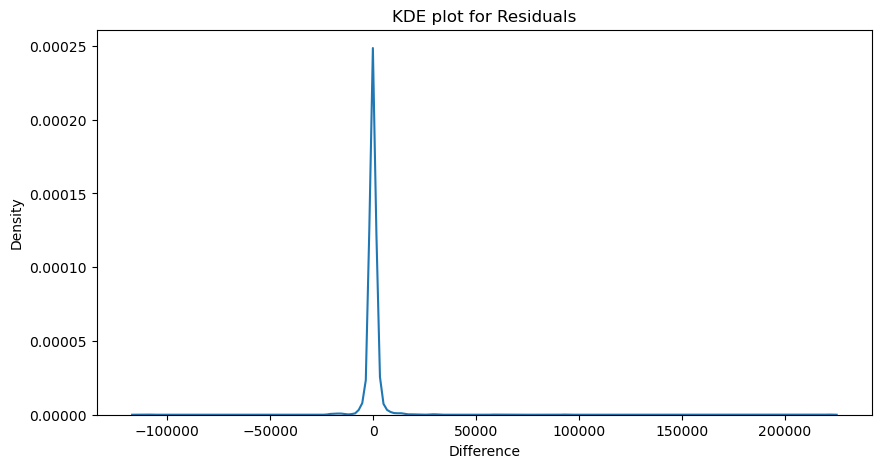

In [54]:
plt.figure(figsize = (10,5))
sns.kdeplot(data = df ,x = Residuals1_df['Difference'])
plt.title('KDE plot for Residuals')
plt.show()

##### Findings:

* Model predictions are close to actuals for most observations